***
## YOLO V3 快速上手版
## 本篇教學訓練自己的的資料集，原作者github有提供如何使用VOC2007進行Demo可以參考 

## qqwweee/keras-yolo3 https://github.com/qqwweee/keras-yolo3



***
## Step 0:
在github文檔說明中，有提供以下運作說明(Quick Start)。
## Quick Start:
 
- [x] 1.Download YOLOv3 weights from YOLO website.
- [x] 2.Convert the Darknet YOLO model to a Keras model.
- [ ] 3.Run YOLO detection.
#### 在第一點與第二點，皆已先完成，檔案放在“model_data/yolo_weights.h5”，pretrain model的路徑，已經先設定完畢。
#### 第三點則是直接拿來測試，若要進行訓練請跳過。

***
### Step 1:
### 利用 “owndata.py”將自己的訓練資料與標記改寫成yolo v3可以使用的格式，原始圖片請放在 “own_data/img”，label的xml請直接放在“own_data/xml”，名稱請統一，並且請進入“owndata.py” 修改 “classes” 請依照類別的順序修改內容

### 最後會在keras-yolo3下面產生 “own_datapath.txt”這就是要餵給yolov3的文件

#### “own_datapath.txt”的內容每一行  會是以下(路徑 空白一格,boundbox,類別index)
#### Example: ”own_data/img/car1.jpg 52,12,544,313,6“


### 修改完畢後，跑以下cell訓練

In [3]:
%run owndata.py

檔案： car1.jpg
['car1.jpg']


***
### Step 2:
### 請改寫 “model_data/own_classes.txt”裡面的類別，裡面有範例，請依照順序改為自己的類別，一些細節參數或是要改變路徑，在”train.py“裡面有說明，目前路徑都已經規劃好，不需要更改
### 修改完畢後，跑以下cell訓練，訓練完畢後，最後會在產生“log/000/trained_weights_final.h5”，這個weight的檔案請更名為”yolo_weights.h5”，並且取代放在model_data資料夾下的同檔案。
### 注意，在“train.py”可以關閉GPU，若發生訓練卡住的狀況，裡面有說明可以更改設置

### @請注意 "train.py" 裡面有 val_split = 0.5，將全部吃進去的圖片，一半拿來進行驗證，若不需要那麼多，請到裡面進行修改，記得必須數量達到能夠切割的資料比例，否則會發生錯誤。
### @由於方便，目前的內容裡面是以同一張圖片重複6次，進行訓練。

In [4]:
%run train.py

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Create YOLOv3 model with 9 anchors and 20 classes.


OSError: Unable to open file (unable to open file: name = 'model_data/yolo_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

***
### Step 3:
### 修改“yolo.py”之中的“classes_path”的內容，請改成“model_data/own_classes.txt”，自己類別的txt文件，也就是在step 1的同一份，修改後，由於jupyternote的bug，請先重複運行以下的cell直到可以正常顯示圖片，之後再起動下下個cell的程式碼來運行測試，啟動後會需要輸入圖片名稱，如果放在與程式碼同一個資料夾類，直接輸入名稱即可讀取圖片進行測試。
### 注意：如果測試後發現圖片難以辨識出來，請調整“yolo.py”中的“score”，程式碼裡面有說明。

### 這個Cell為測試圖片顯示，重複運行此Cell直到正確顯示圖片後，在運行下下個Cell進行測試。

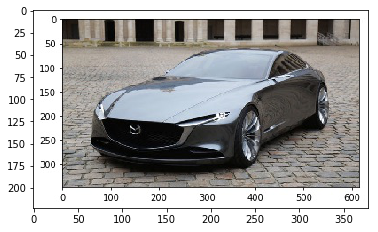

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('car1.jpg',cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(image)
plt.show()

### 運行以下的程式，等待一段時間後會出現"Input image filename:"，若圖片的檔案位址與此程式碼相同，請在後面輸入所要辨識的圖片名稱，若在其他資料夾中，請連帶位置跟檔名一起輸入。

In [ ]:
%run yolo_video.py